# 1.10. Arbres de décision

Les **arbres de décision** (*Decision Trees* - DTs) sont une méthode d'apprentissage supervisé non paramétrique utilisée pour la classification et la régression. L'objectif est de créer un modèle qui prédit la valeur d'une variable cible en apprenant des règles de décision simples déduites des caractéristiques des données. Un arbre peut être vu comme une approximation constante par morceaux.

Par exemple, dans l'exemple ci-dessous, les arbres de décision apprennent à partir des données pour approximer une courbe sinusoïdale avec un ensemble de règles de décision if-then-else. Plus l'arbre est profond, plus les règles de décision sont complexes et plus le modèle est adapté.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_001.png)

Certains avantages des arbres de décision sont :

* Simple à comprendre et à interpréter. Les arbres peuvent être visualisés.

* Nécessite peu de préparation des données. D'autres techniques nécessitent souvent une normalisation des données, des variables fictives doivent être créées et des valeurs vides doivent être supprimées. Notez cependant que ce module ne prend pas en charge les valeurs manquantes.

* Le coût d'utilisation de l'arbre (c'est-à-dire la prédiction des données) est logarithmique en le nombre de points de données utilisés pour former l'arbre.

* Capable de traiter des données numériques et catégorielles. Cependant, l'implémentation de scikit-learn ne prend pas en charge les variables catégorielles pour le moment. D'autres techniques sont généralement spécialisées dans l'analyse d'ensembles de données qui n'ont qu'un seul type de variable. Voir les algorithmes pour plus d'informations.

* Capable de gérer les problèmes multi-sorties.

* Utilise un modèle de boîte blanche. Si une situation donnée est observable dans un modèle, l'explication de la condition est facilement expliquée par la logique booléenne. En revanche, dans un modèle de boîte noire (par exemple, dans un réseau de neurones artificiels), les résultats peuvent être plus difficiles à interpréter.

* Possibilité de valider un modèle à l'aide de tests statistiques. Cela permet de rendre compte de la fiabilité du modèle.

* Fonctionne bien même si ses hypothèses sont quelque peu violées par le vrai modèle à partir duquel les données ont été générées.

Les inconvénients des arbres de décision incluent :

* Les apprenants en arbre de décision peuvent créer des arbres trop complexes qui ne généralisent pas bien les données. C'est ce qu'on appelle le surajustement. Des mécanismes tels que l'élagage, la définition du nombre minimum d'échantillons requis à un nœud feuille ou la définition de la profondeur maximale de l'arbre sont nécessaires pour éviter ce problème.

* Les arbres de décision peuvent être instables car de petites variations dans les données peuvent entraîner la génération d'un arbre complètement différent. Ce problème est atténué par l'utilisation d'arbres de décision au sein d'un ensemble.

* Les prédictions des arbres de décision ne sont ni lisses ni continues, mais des approximations constantes par morceaux, comme le montre la figure ci-dessus. Par conséquent, ils ne sont pas bons pour l'extrapolation.

* Le problème d'apprentissage d'un arbre de décision optimal est connu pour être NP-complet sous plusieurs aspects de l'optimalité et même pour des concepts simples. Par conséquent, les algorithmes pratiques d'apprentissage d'arbre de décision sont basés sur des algorithmes heuristiques tels que l'algorithme glouton où des décisions localement optimales sont prises à chaque nœud. De tels algorithmes ne peuvent pas garantir de retourner l'arbre de décision globalement optimal. Cela peut être atténué en formant plusieurs arbres dans un apprenant d'ensemble, où les caractéristiques et les échantillons sont échantillonnés de manière aléatoire avec remplacement.

* Il existe des concepts difficiles à apprendre car les arbres de décision ne les expriment pas facilement, comme les problèmes de OU exclusif, de parité ou de multiplexeur.

* Les apprenants de l'arbre de décision créent des arbres biaisés si certaines classes dominent. Il est donc recommandé d'équilibrer l'ensemble de données avant de l'adapter à l'arbre de décision.


## 1.10.1. Classification

[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) est une classe capable d'effectuer une classification multi-classes sur un ensemble de données.

Comme avec les autres classifieurs, [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) prend en entrée deux tableaux : un tableau X, creuse ou dense, de forme `(n_samples, n_features)` contenant les échantillons d'apprentissage, et un tableau Y de valeurs entières, forme `(n_samples,)`, contenant les étiquettes de classe pour les échantillons d'apprentissage :



In [1]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Après avoir été ajusté, le modèle peut être utilisé pour prédire la classe d'échantillons :

In [2]:
clf.predict([[2., 2.]])

array([1])

Dans le cas où il existe plusieurs classes avec la même probabilité et la plus élevée (<mark>NDLR > pas clair</mark>), le classifieur prédira la classe avec l'indice le plus bas parmi ces classes.

Comme alternative à la sortie d'une classe spécifique, la probabilité de chaque classe peut être prédite, laquelle est la fraction d'échantillons d'entraînement de la classe dans une feuille :

In [3]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) est capable à la fois d'une classification binaire (où les étiquettes sont $[-1, 1]$) et d'une classification multiclasse (où les étiquettes sont $[0, …, K-1]$).

En utilisant le jeu de données Iris, nous pouvons construire un arbre comme suit :

In [4]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

Une fois entraîné, vous pouvez tracer l'arbre avec la fonction `plot_tree` :

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

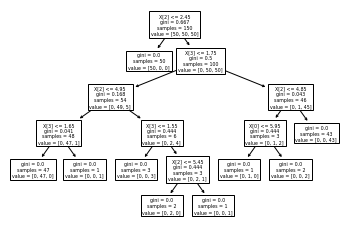

In [5]:
tree.plot_tree(clf)

# TODO : voir pouruuoi il y a divergence avec l'exemple donné par ScikitLearn

Nous pouvons également exporter l'arbre au format [Graphviz](https://www.graphviz.org) en utilisant l'exporteur [`export_graphviz`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz). Si vous utilisez le gestionnaire de packages [conda](https://conda.io), les fichiers binaires graphviz et le package python peuvent être installés avec `conda install python-graphviz`.

Alternativement, les binaires pour graphviz peuvent être téléchargés à partir de la page d'accueil du projet graphviz, et le wrapper Python installé à partir de pypi avec `pip install graphviz`.

Vous trouverez ci-dessous un exemple d'exportation graphviz de l'arbre ci-dessus formé sur l'ensemble de données d'iris ; les résultats sont enregistrés dans un fichier de sortie `iris.pdf` :

In [6]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

L'exporteur [`export_graphviz`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz) prend également en charge une variété d'options esthétiques, y compris la coloration des nœuds par leur classe (ou leur valeur de régression) et l'utilisation de noms de variables et de classes explicites si vous le souhaitez. Les notebooks Jupyter affichent également automatiquement ces graphiques en ligne :

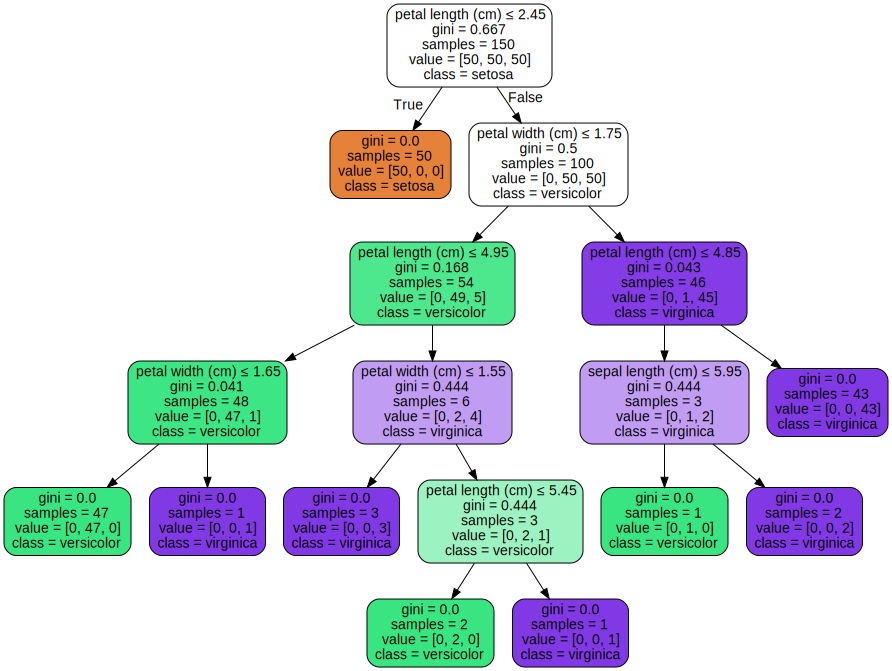

In [9]:
dot_data = tree.export_graphviz(clf, out_file=None, 
    feature_names=iris.feature_names,  
    class_names=iris.target_names,  
    filled=True, rounded=True,  
    special_characters=True)  
graph = graphviz.Source(dot_data)  
display(graph)

Alternativement, l'arbre peut également être exporté au format texte avec la fonction [`export_text`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html#sklearn.tree.export_text). Cette méthode ne nécessite pas l'installation de librairies externes et est plus compacte :

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



### [**Exemple ⭐⭐⭐** : Tracer la surface de décision des arbres de décision formés sur l'ensemble de données iris](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

Trace la surface de décision d'un arbre de décision formé sur des paires de caractéristiques de l'ensemble de données d'iris.

Pour chaque paire de caractéristiques d'iris, l'arbre de décision apprend les limites de décision constituées de combinaisons de règles de seuillage simples déduites des échantillons d'apprentissage.

Nous montrons également l'arborescence d'un modèle construit sur l'ensemble des caractéristiques.

Chargeons d'abord la copie de l'ensemble de données Iris fourni avec scikit-learn :

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

Affichez les fonctions de décision des arbres entraînés sur toutes les paires d'entités.

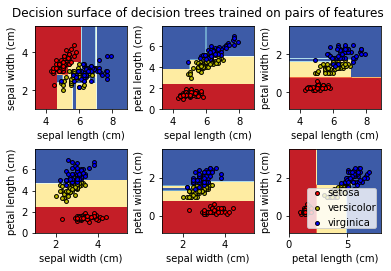

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay


# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

Affichez la structure d'un arbre de décision unique formé sur toutes les fonctionnalités ensemble.

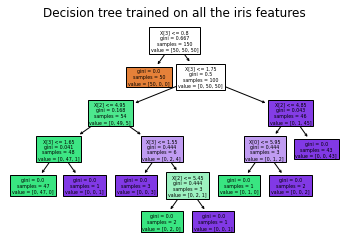

In [11]:
from sklearn.tree import plot_tree

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

### [**Exemple ⭐⭐⭐⭐** : Comprendre la structure de l'arbre de décision](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

La structure de l'arbre de décision peut être analysée pour mieux comprendre la relation entre les caractéristiques et la cible à prédire. Dans cet exemple, nous montrons comment récupérer :
* la structure arborescente binaire ;
* la profondeur de chaque nœud et s'il s'agit ou non d'une feuille ;
* les nœuds qui ont été atteints par un échantillon à l'aide de la méthode decision_path ;
* la feuille qui a été atteinte par un échantillon en utilisant la méthode d'application ;
* les règles qui ont été utilisées pour prédire un échantillon ;
* le chemin de décision partagé par un groupe d'échantillons.

In [13]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#### Entraîner le classificateur d'arbres

Tout d'abord, nous adaptons un [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) à l'aide du jeu de données [`load_iris`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris).

In [14]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

#### Arborescence

Le classifieur de décision a un attribut appelé `tree_` qui permet d'accéder à des attributs de bas niveau tels que `node_count`, le nombre total de nœuds, et `max_depth`, la profondeur maximale de l'arbre. Il stocke également toute la structure de l'arborescence binaire, représentée par un certain nombre de tableaux parallèles. Le i-ème élément de chaque tableau contient des informations sur le nœud `i`. Le nœud 0 est la racine de l'arborescence. Certains des tableaux ne s'appliquent qu'aux feuilles ou aux nœuds divisés. Dans ce cas les valeurs des nœuds de l'autre type sont arbitraires. Par exemple, les tableaux `feature` et `threshold` ne s'appliquent qu'aux nœuds fractionnés. Les valeurs des nœuds feuilles dans ces tableaux sont donc arbitraires.

Parmi ces tableaux, nous avons :
* `children_left[i]` : id de l'enfant gauche du nœud `i` ou -1 si nœud feuille
* `children_right[i]` : id du fils droit du nœud `i` ou -1 si nœud feuille
* `feature[i]` : fonctionnalité utilisée pour diviser le nœud `i`
* `threshold[i]` : valeur de seuil au nœud `i`
* `n_node_samples[i]` : le nombre d'échantillons d'apprentissage atteignant le nœud `i`
* `impurity[i]` : l'impureté au nœud `i`

En utilisant les tableaux, nous pouvons parcourir la structure arborescente pour calculer diverses propriétés. Ci-dessous, nous calculerons la profondeur de chaque nœud et s'il s'agit ou non d'une feuille.

In [15]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 5 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 3] <= 0.800000011920929 else to node 2.
	node=1 is a leaf node.
	node=2 is a split node: go to node 3 if X[:, 2] <= 4.950000047683716 else to node 4.
		node=3 is a leaf node.
		node=4 is a leaf node.


Nous pouvons comparer la sortie ci-dessus au tracé de l'arbre de décision.

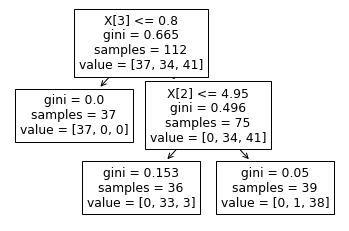

In [16]:
tree.plot_tree(clf)
plt.show()

#### Chemin de décision

Nous pouvons également récupérer le chemin de décision des échantillons d'intérêt. La méthode `decision_path` génère une matrice d'indicateurs qui nous permet de récupérer les nœuds traversés par les échantillons d'intérêt. Un élément non nul dans la matrice indicatrice à la position `(i, j)` indique que l'échantillon `i` passe par le nœud `j`. Ou, pour un échantillon `i`, les positions des éléments non nuls dans la ligne `i` de la matrice d'indicateurs désignent les identifiants des nœuds traversés par l'échantillon.

Les identifiants de feuille atteints par les échantillons d'intérêt peuvent être obtenus avec la méthode `apply`. Cela renvoie un tableau des identifiants de nœud des feuilles atteintes par chaque échantillon d'intérêt. En utilisant les identifiants de feuille et `decision_path`, nous pouvons obtenir les conditions de fractionnement qui ont été utilisées pour prédire un échantillon ou un groupe d'échantillons. Tout d'abord, faisons-le pour un échantillon. Notez que `node_index` est une matrice creuse.

In [17]:
node_indicator = clf.decision_path(X_test)
leaf_id = clf.apply(X_test)

sample_id = 0
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]

print("Rules used to predict sample {id}:\n".format(id=sample_id))
for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue

    # check if value of the split feature for sample 0 is below threshold
    if X_test[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        "decision node {node} : (X_test[{sample}, {feature}] = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            sample=sample_id,
            feature=feature[node_id],
            value=X_test[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )

Rules used to predict sample 0:

decision node 0 : (X_test[0, 3] = 2.4) > 0.800000011920929)
decision node 2 : (X_test[0, 2] = 5.1) > 4.950000047683716)


Pour un groupe d'échantillons, on peut déterminer les nœuds communs traversés par les échantillons.

In [18]:
sample_ids = [0, 1]
# boolean array indicating the nodes both samples go through
common_nodes = node_indicator.toarray()[sample_ids].sum(axis=0) == len(sample_ids)
# obtain node ids using position in array
common_node_id = np.arange(n_nodes)[common_nodes]

print(
    "\nThe following samples {samples} share the node(s) {nodes} in the tree.".format(
        samples=sample_ids, nodes=common_node_id
    )
)
print("This is {prop}% of all nodes.".format(prop=100 * len(common_node_id) / n_nodes))


The following samples [0, 1] share the node(s) [0 2] in the tree.
This is 40.0% of all nodes.
